##### Import Library and load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('credit_card_churn.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)

##### Data exploration

In [2]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

- จำนวนข้อมูลมีทั้งหมด 20 ตัวโดยแบ่งเป็นข้อมูล 
    - numerical 14 ตัว
    - categorical 6 ตัว
- output ของข้อมูลคือ Attrition_Flag ซึ่งเป็นข้อมูลประเภท categorical

plot numerical data

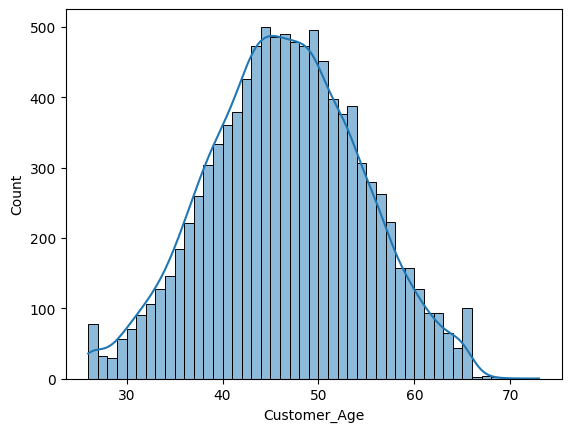

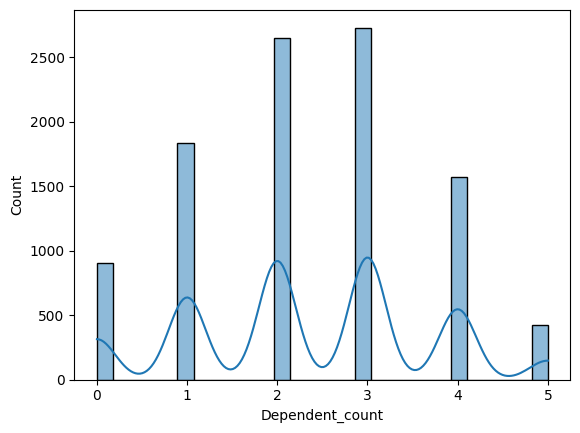

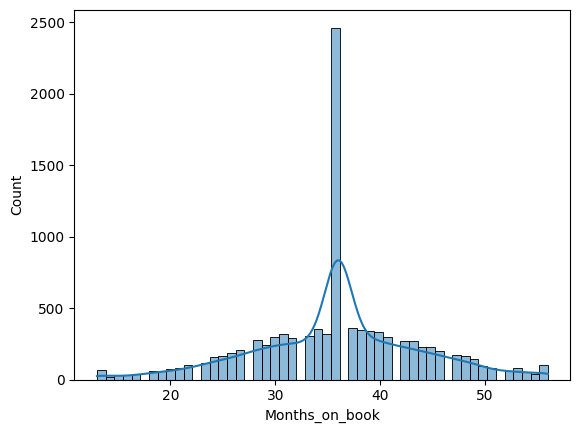

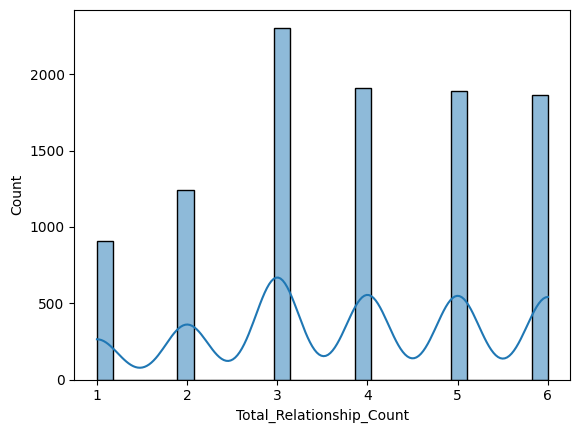

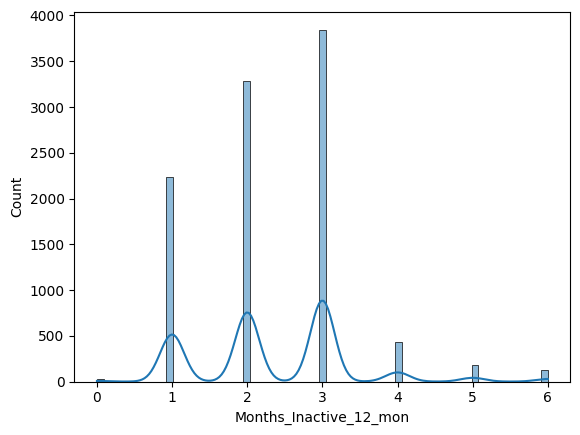

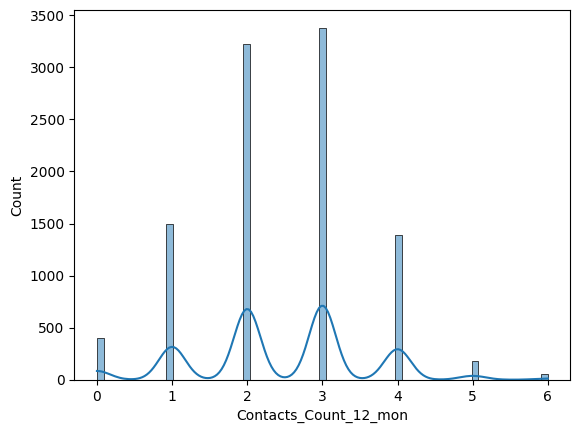

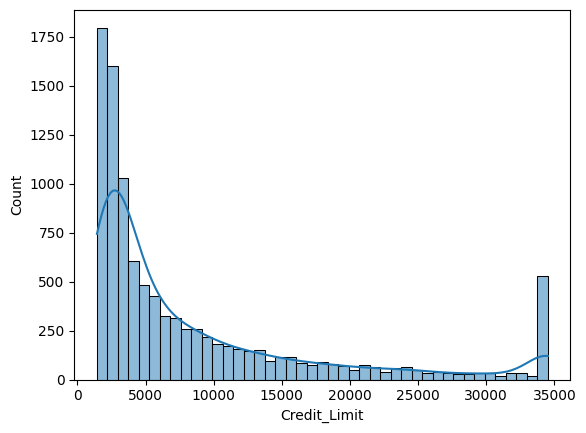

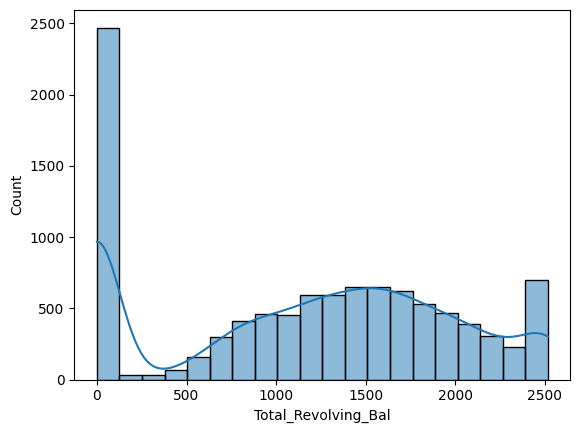

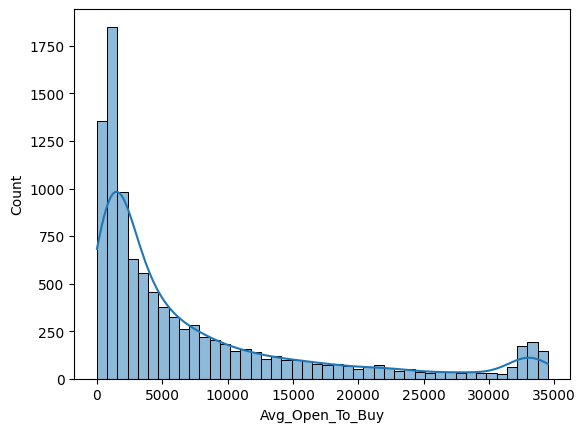

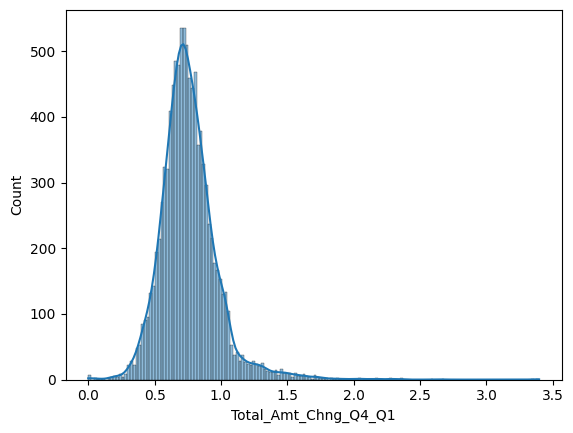

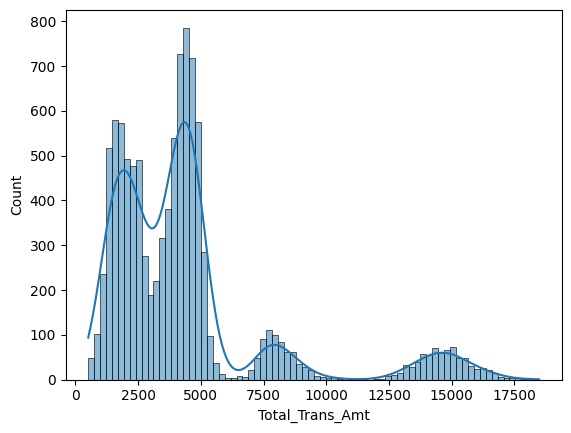

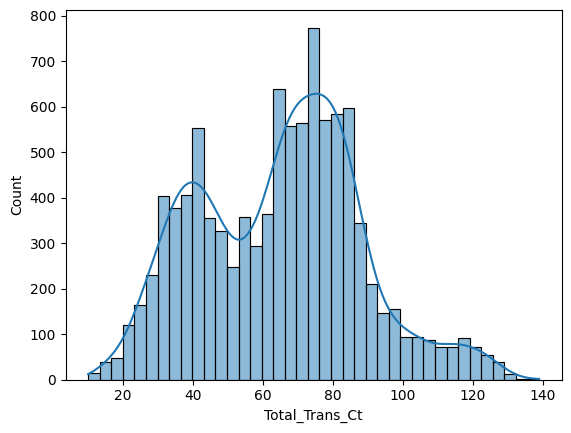

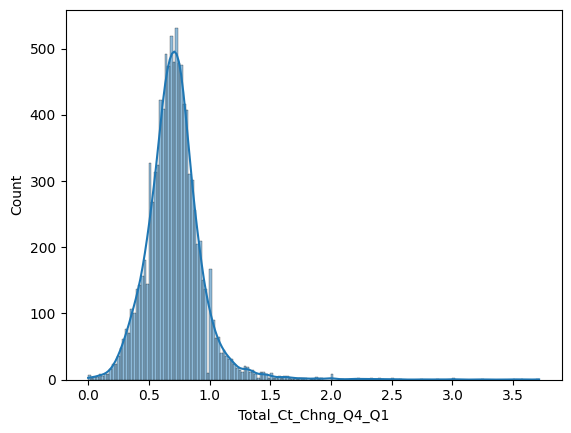

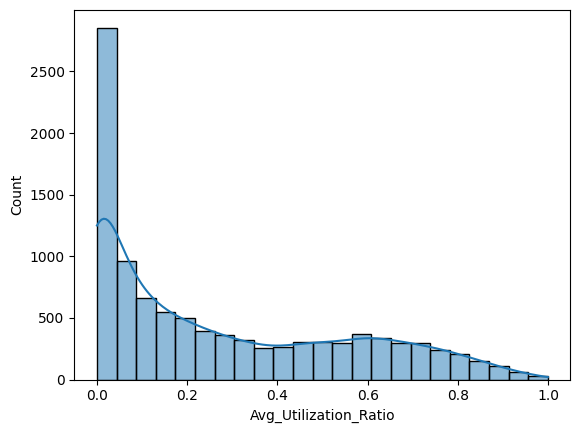

In [3]:
###### plot numerical data
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))
for i in num_data:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

จากการ plot numerical data
- ข้อมูล Customer_Age มี outlier ที่อายุมากกว่า 66
- ข้อมูล Total_Ct_Chng_Q4_Q1 มี outlier ที่จำนวนมากกว่า 1.6
- ข้อมูล Contact_Count_12_mon จำนวน 6 ครั้งมีน้อยมากจึงพิจารณาเป็น outlier
- ข้อมูล Total_Amt_Chng_Q4_Q1 มี outlier ที่จำนวนมากกว่า 1.6
- ข้อมูล Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt และ Avg_Utilization_Ratio มีความเบ้ขวา

Remove Outlier and Correct Skewed data

In [4]:
##### remove outlier
df = df.loc[df['Customer_Age'] <= 66]
df = df.loc[df['Total_Ct_Chng_Q4_Q1'] <= 1.6]
df = df.loc[df['Months_Inactive_12_mon'] < 6]
df = df.loc[df['Total_Amt_Chng_Q4_Q1'] <= 1.6]

##### correct skewed data
df['Credit_Limit'] = np.log10(df['Credit_Limit'])
fitted_data, fitted_lambda = stats.boxcox(df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy'] = fitted_data
df['Total_Trans_Amt'] = np.log10(df['Total_Trans_Amt'])
df['Avg_Utilization_Ratio'] = (df['Avg_Utilization_Ratio'])**(1/2)

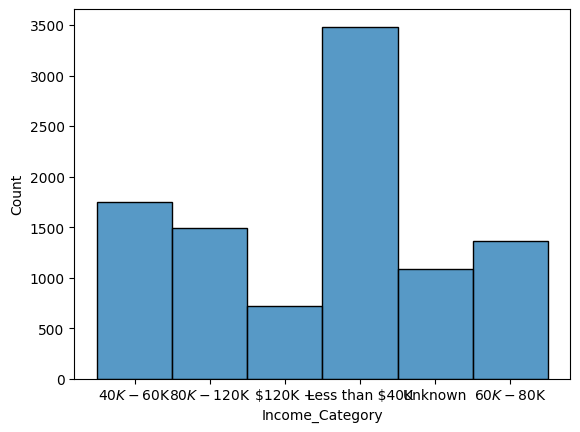

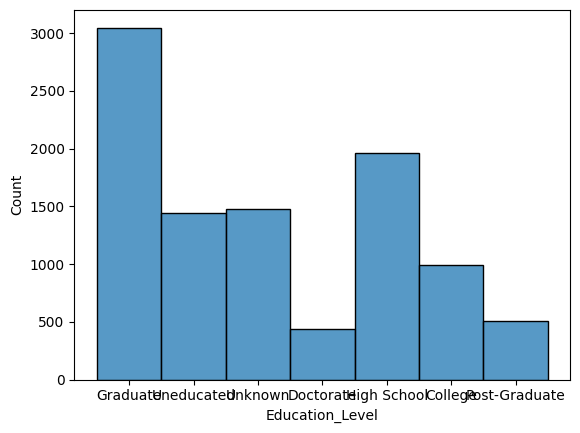

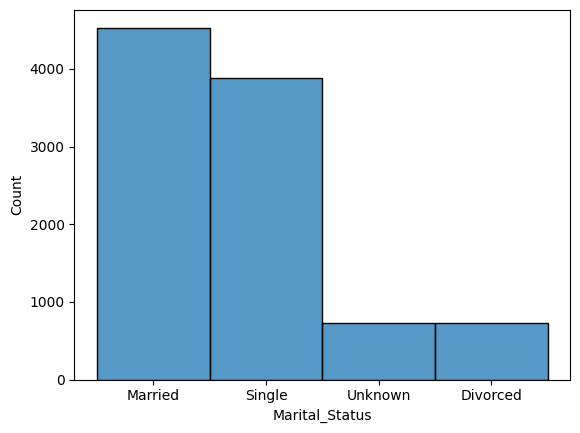

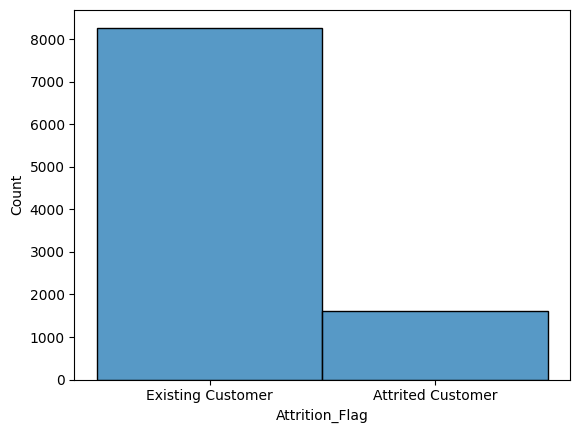

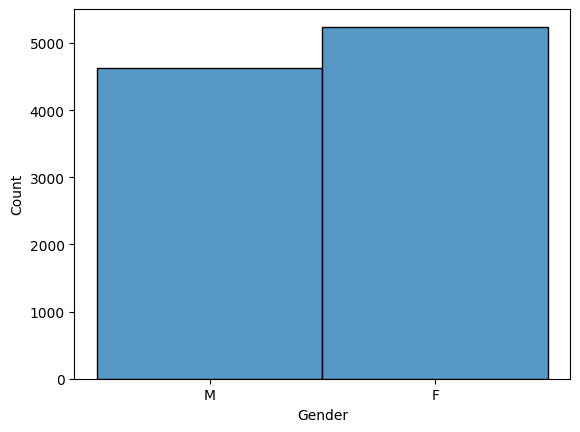

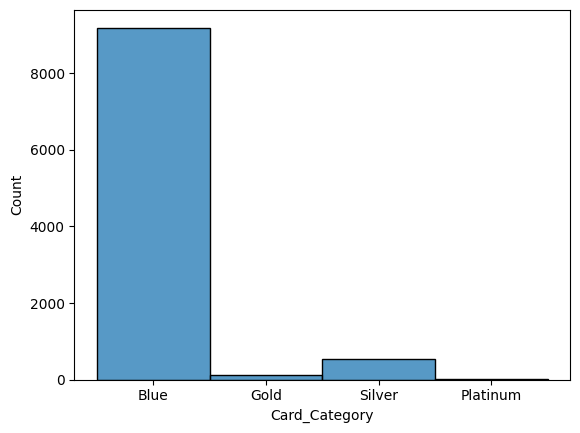

In [5]:
for i in cat_data:
    sns.histplot(data = df, x = i, kde = False)
    plt.show()

จากการ plot Categorical data
- ข้อมูล output หรือ Attrition_Flag มีความ Imbalance โดย Attrited Customer คิดเป็นเพียง 16% ของข้อมูลทั้งหมด
- ข้อมูล Card_Category ที่เป็นระดับ platinum มีจำนวนผู้ใช้งานเพียง 0.002% จากข้อมูลทั้งหมดจึงทำการลบ instance เหล่านี้ทิ้ง

In [6]:
print(df['Card_Category'].value_counts())
df = df.loc[df['Card_Category'] != 'Platinum']

Blue        9197
Silver       546
Gold         113
Platinum      20
Name: Card_Category, dtype: int64


Plot Heatmap เพื่อดูความสัมพันธุ์ระหว่าง Output กับข้อมูลประเภท Numerical

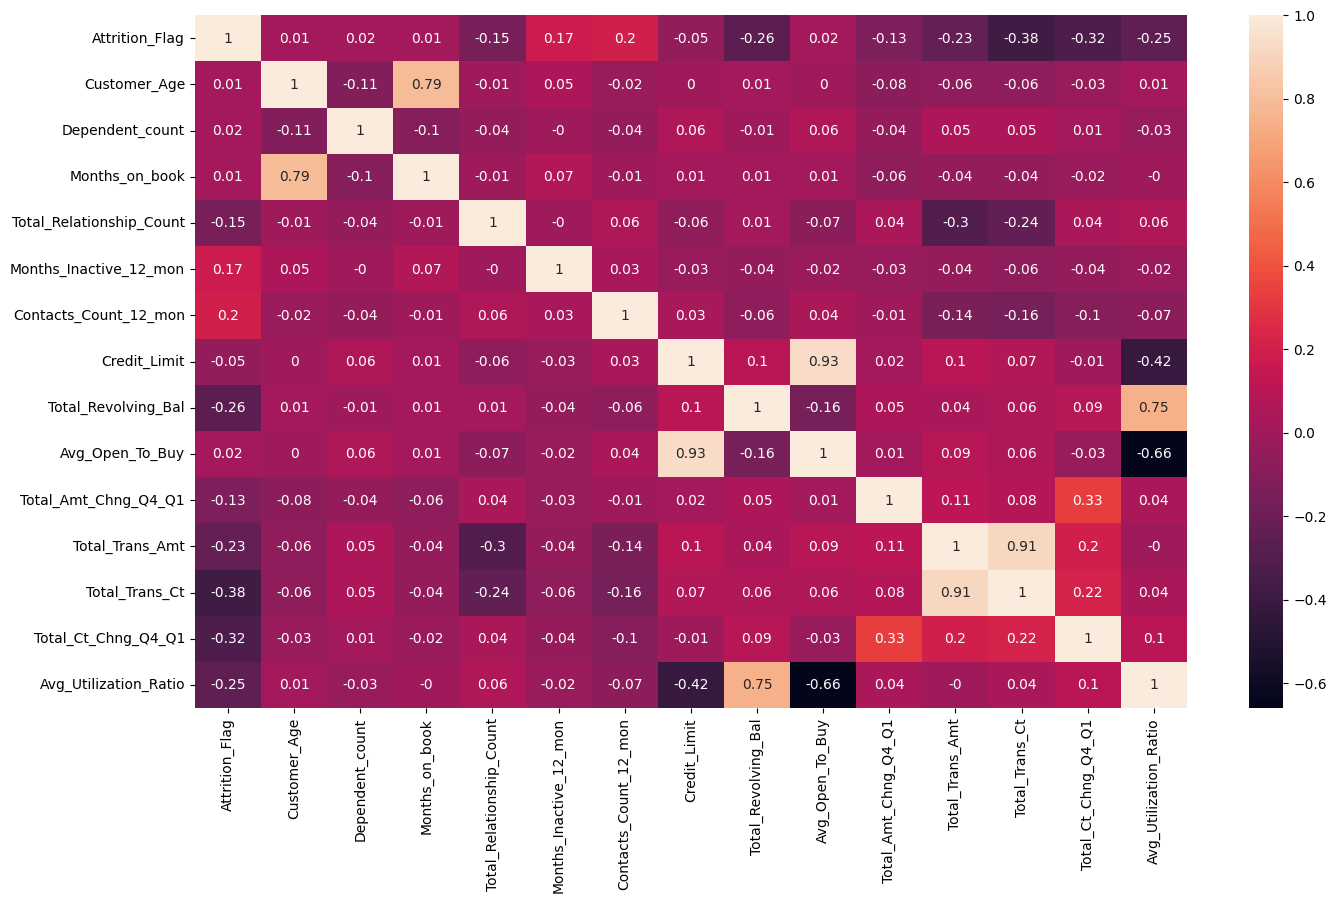

In [7]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Existing Customer', 'Attrited Customer'], [0, 1])
plt.figure(figsize = (16,9))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

จากการ Plot Heatmap พบว่าค่าความสัมพันธุ์ของ feature กับ Output ที่มีค่ามากกว่า 0.1 เรียงจากมากไปน้อยได้ดังนี้
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Total_Relationship_Count
- Total_Amt_Chng_Q4_Q1

และความความสัมพันธ์ระหว่างข้อมูล ที่มีค่ามากกว่า 0.1 เรียงจากมากไปน้อยได้ดังนี้
- 0.93 : Avg_Open_To_Buy / Credit_Limit
- 0.91 : Total_Trans_Ct / Total_Trans_Amt
- 0.79 : Months_on_book / Customer_Age
- 0.75 : Avg_Utilization_Ratio / Total_Revolving_Bal
- 0.66 : Avg_Utilization_Ratio / Avg_Open_To_Buy
- 0.42 : Avg_Utilization_Ratio / Credit_Limit
- 0.33 : Total_Ct_Chng_Q4_Q1 / Total_Amt_Chng_Q4_Q1
- 0.30 : Total_Trans_Amt / Total_Relationship_Count
- 0.24 : Total_Trans_Ct / Total_Relationship_Count
- 0.22 : Total_Ct_Chng_Q4_Q1 / Total_Trans_Ct
- 0.20 : Total_Ct_Chng_Q4_Q1 / Total_Trans_Amt
- 0.16 : Total_Trans_Ct  / Contacts_Count_12_mon
- 0.14 : Total_Trans_Amt / Contacts_Count_12_mon
- 0.11 : Total_Trans_Amt / Total_Amt_Chng_Q4_Q1
- 0.11 : Dependent_count / Customer_Age
- 0.10 : Total_Ct_Chng_Q4_Q1 / Contacts_Count_12_mon
- 0.10 : Total_Trans_Amt / Credit_Limit
- 0.10 : Avg_Utilization_Ratio / Total_Ct_Chng_Q4_Q1
- 0.10 : Total_Revolving_Bal / Credit_Limit
- 0.10 : Months_on_book / Dependent_count

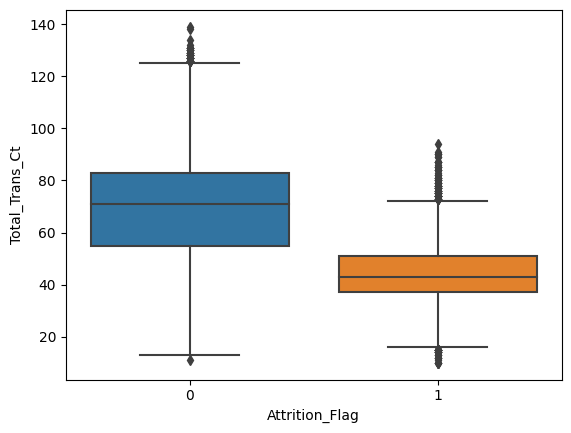

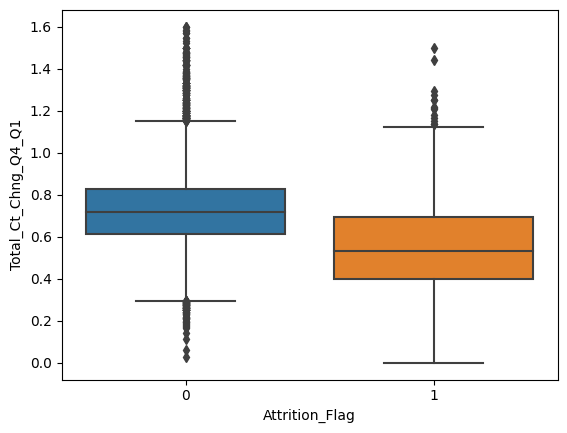

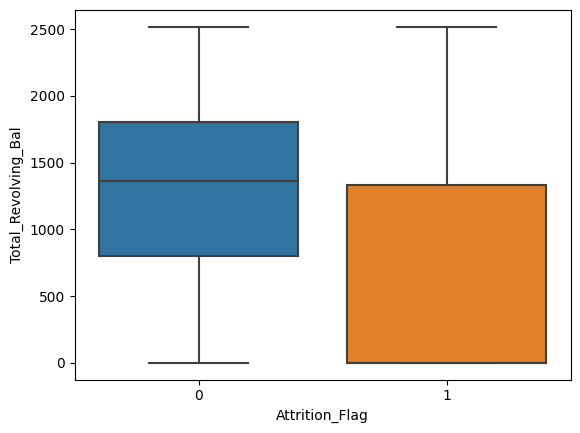

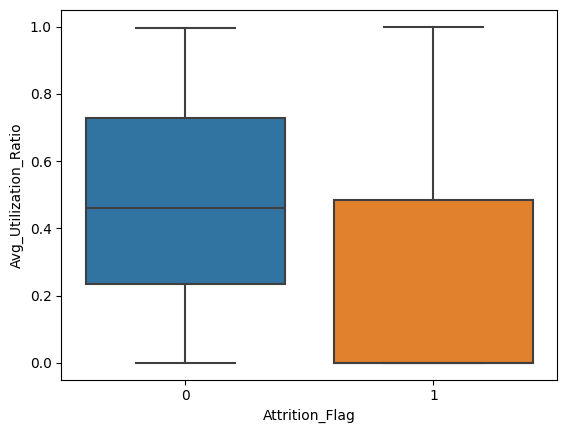

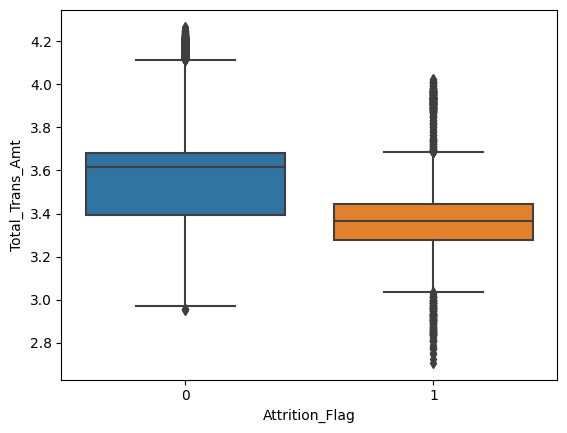

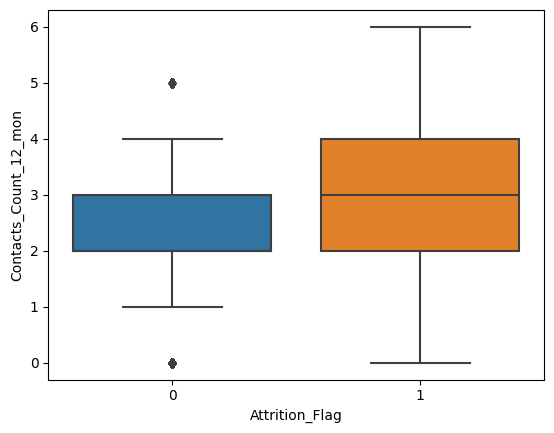

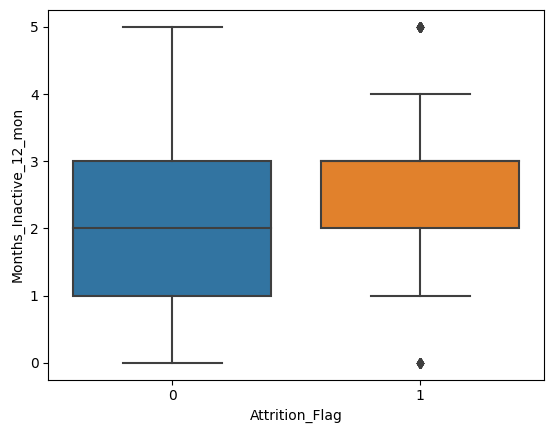

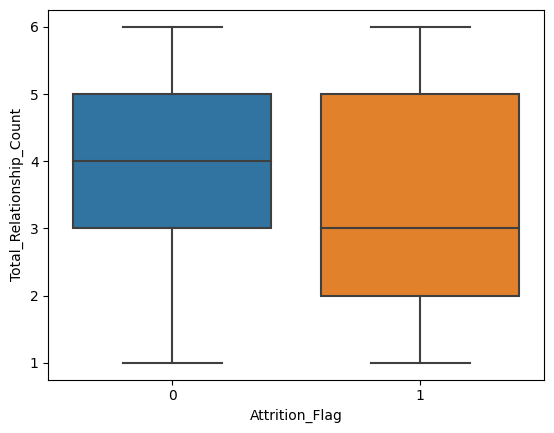

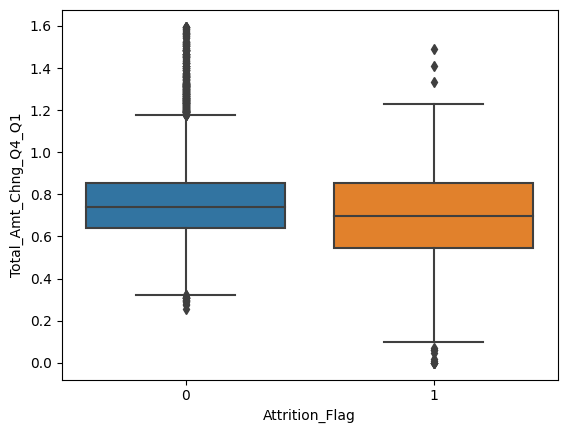

In [8]:
cols = list(df.columns)
relate2output = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1']

for i in relate2output:
    sns.boxplot(data = df, x = 'Attrition_Flag', y = i)
    plt.show()

จากการ Plot relate feature

- ข้อมูลที่มีความสัมพันธุ์กับ output ที่มากที่สุดคือ 0.38 หรือข้อมูล Total_Trans_Ct พบว่าข้อมูลส่วนใหญ่มีการแบ่งกลุ่มอย่างเห็นได้ชัด
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่น้อยกว่า 0.38 แต่มากกว่า 0.2 มีการแบ่งกลุ่มกันแต่มีบางส่วนที่ซ้อนทับกันอยู่
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่น้อยกว่าหรือเท่ากับ 0.2 มีการซ้อนทับกันของข้อมูลอย่างเห็นได้ชัด

Plot ข้อมูลที่มี relation ระหว่างข้อมูลกันเอง

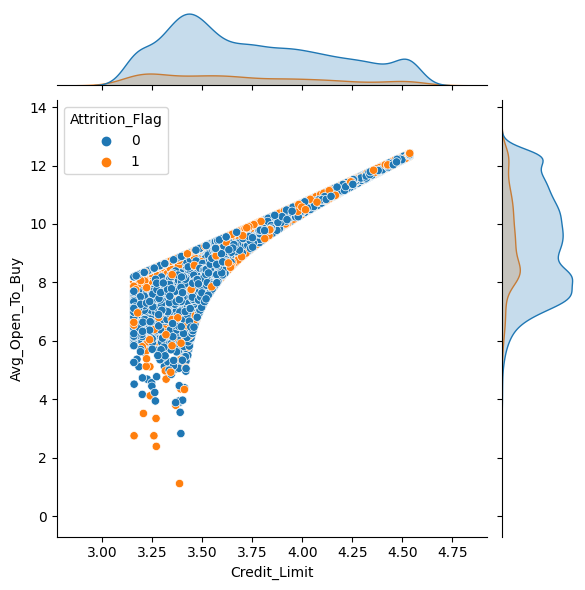

In [9]:
sns.jointplot(data = df, x = 'Credit_Limit', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.show()

จากกราฟ Credit_Limit เทียบ Avg_Open_To_Buy พบว่ามีความสัมพันธุ์ทางคณิตศาสตร์จึงทำให้เลือกตัดข้อมูล Avg_Open_To_Buy เนื่องจากมีความสัมพันธุ์เทียบกับ Output น้อยกว่า Credit_Limit

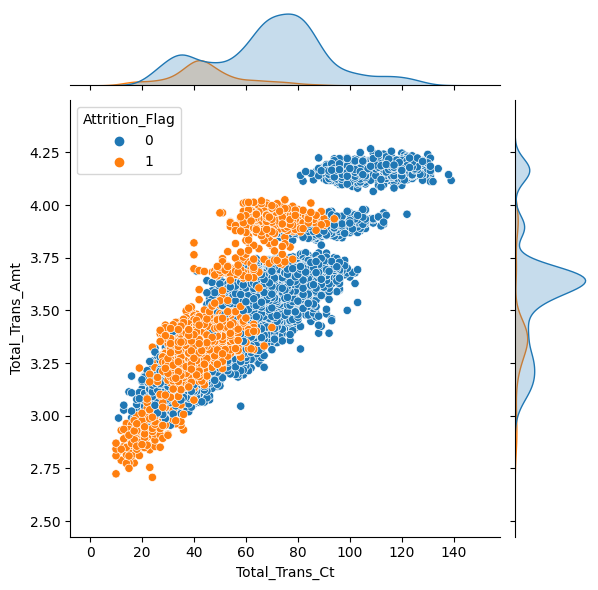

In [10]:
sns.jointplot(data = df, x = 'Total_Trans_Ct', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()

จากกราฟ Total_Trans_Ct เทียบ Total_Trans_Amt พบว่ามีแนวโน้มไปในทางเดียวกันแต่มองเห็นถึงการแบ่งกลุ่มของ output จึงเลือกที่จะเก็บข้อมูลทั้งสองเอาไว้ก่อน

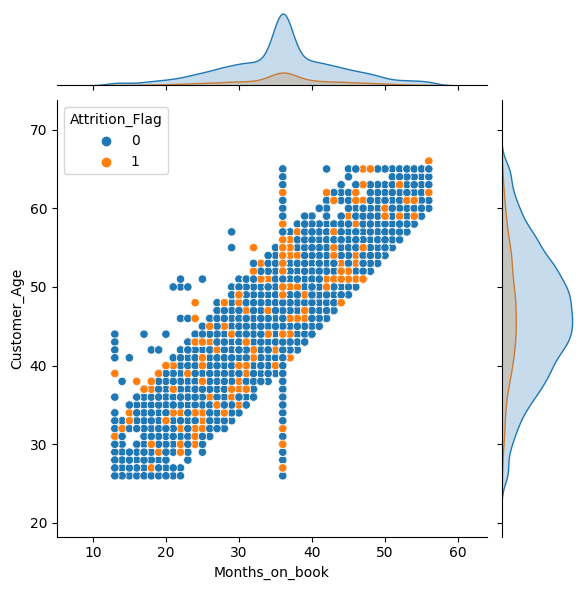

In [11]:
sns.jointplot(data = df, x = 'Months_on_book', y = 'Customer_Age', hue = 'Attrition_Flag')
plt.show()

จากกราฟ Months_on_book เทียบ Customer_Agee พบว่ามีความสัมพันธุ์ทางคณิตศาสตร์อย่างชัดเจนซึ่งทั้งสองมีความสัมพันธุ์กับ output ต่ำมากและจากกราฟไม่แสดงให้เห็นถึงการแบ่งกลุ่มของ Output จึงเป็นเหตุผลที่เลือกตัดทิ้งทั้งสองข้อมูล

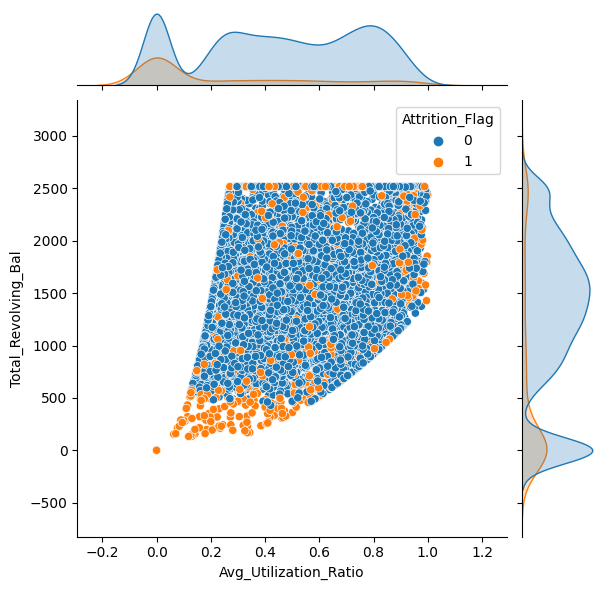

In [12]:
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Total_Revolving_Bal', hue = 'Attrition_Flag')
plt.show()

จากกราฟ Avg_Utilization_Ratio เทียบ Total_Revolving_Bal พบว่ามีความสัมพันธุ์กันแต่อยู่ในขอบเขตที่กว้างและเห็นถึงข้อมูล Attrited Customer บางส่วนในช่วง (0,0) ถึง (0.6, 500)

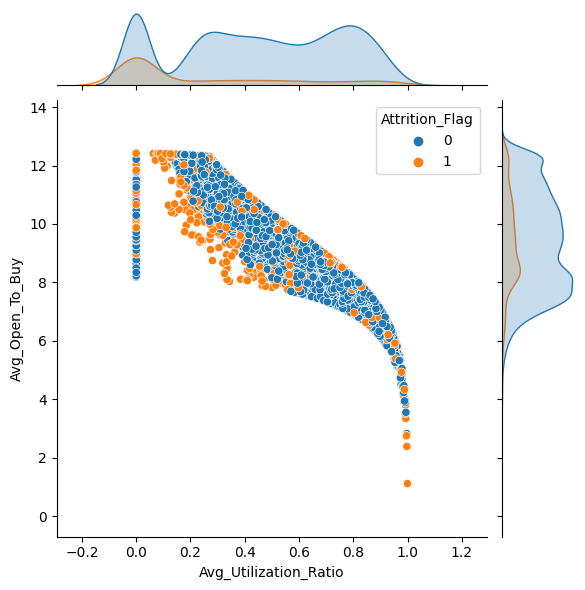

In [13]:
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.show()

จากกราฟ Avg_Utilization_Ratio เทียบ Avg_Open_To_Buy มีความสัมพันธุ์ทางคณิตศาสตร์ที่ชัดเจนมากและจาก plot กราฟ Credit_Limit เทียบ Avg_Open_To_Buy ที่ได้เลือกทำการตัด Avg_Open_To_Buy จึงเก็บข้อมูล Avg_Utilization_Ratio เอาไว้

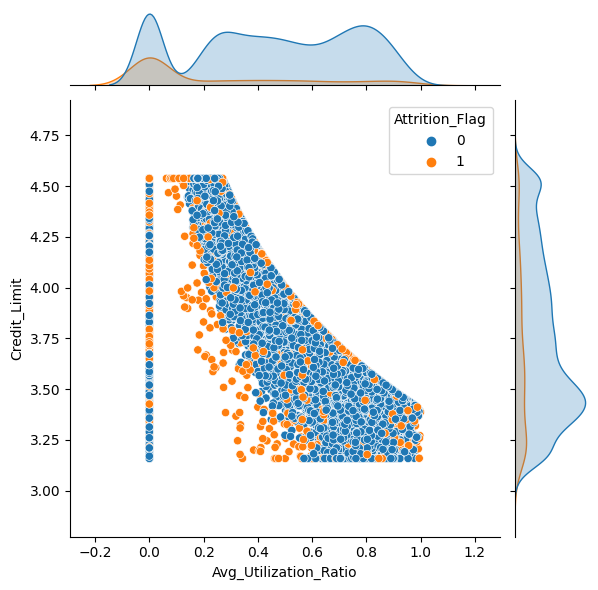

In [14]:
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Attrition_Flag')
plt.show()

จากกราฟ Avg_Utilization_Ratio เทียบ Credit_Limit พบเห็นความสัมพันธุ์ทางคณิตศาสตร์แต่อยู่ในช่วงที่กว้างและตรงขอบของกราฟมีการกระจายตัวของ Output อยู่จึงทำให้เลือกเก็บข้อมูลทั้งสองข้อมูลเอาไว้

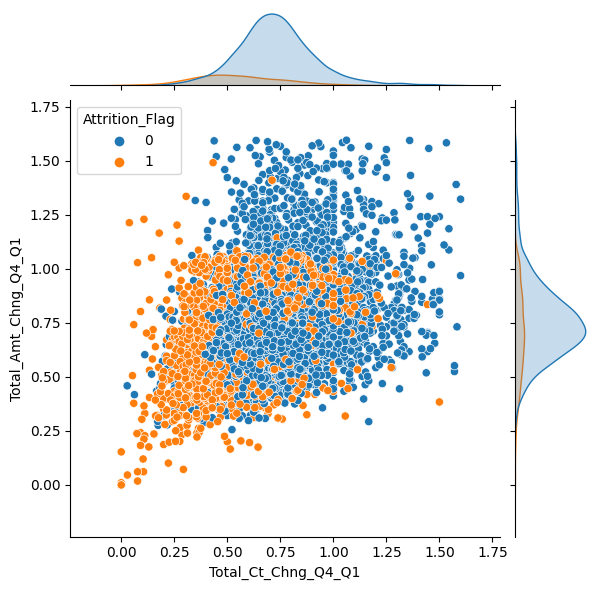

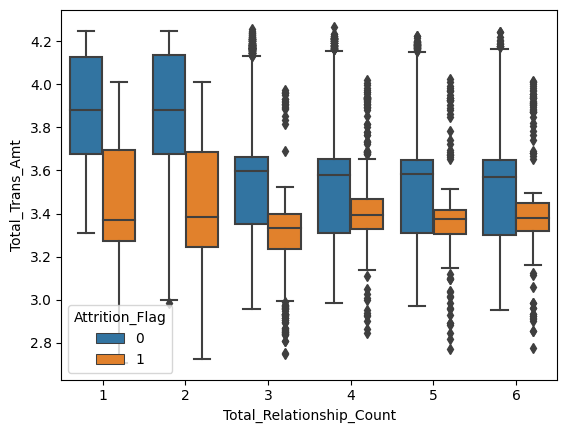

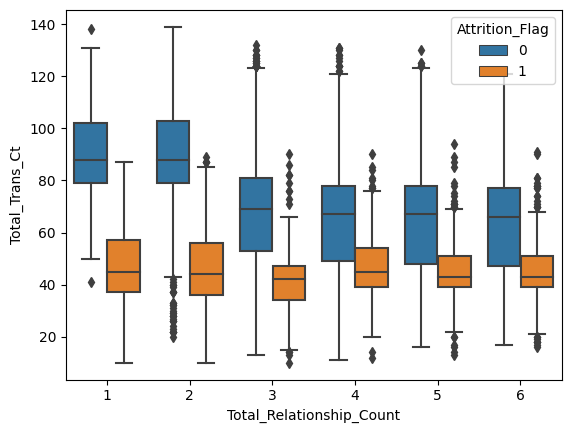

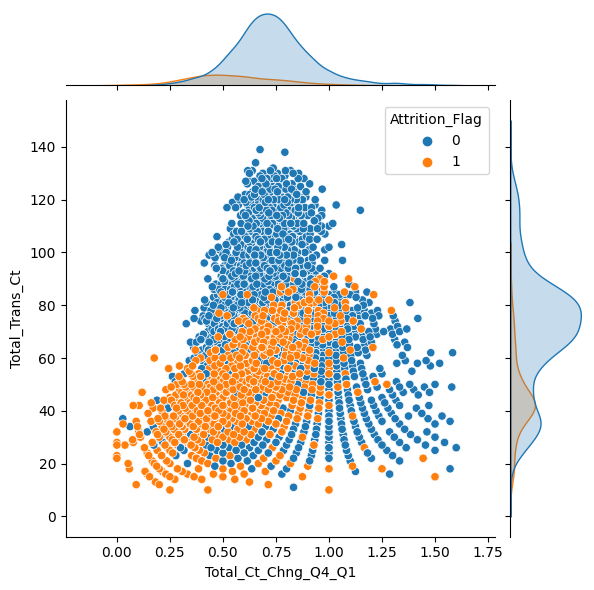

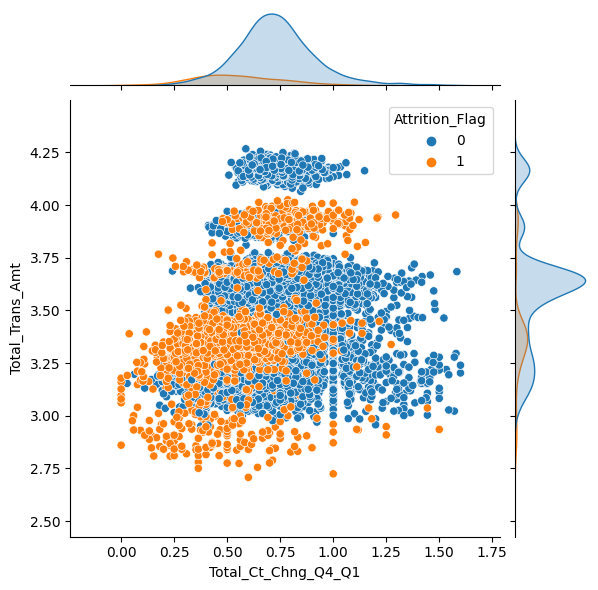

In [15]:
sns.jointplot(data = df, x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Amt_Chng_Q4_Q1', hue = 'Attrition_Flag')
plt.show()
sns.boxplot(data = df, x = 'Total_Relationship_Count', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()
sns.boxplot(data = df, x = 'Total_Relationship_Count', y = 'Total_Trans_Ct', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Trans_Ct', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()

จากการ plot กราฟที่มีความสัมพันธ์กันเองที่เหลือทั้งหมดพบว่าไม่เห็นถึงความสัมพันธ์ทางคณิตศาสตร์ที่ชัดเจนจึงทำให้เลือกที่จะไม่ตัดข้อมูลใดออก

สรุปจากการ plot ความสัมพันธ์ระหว่างข้อมูลกันเองทำให้เลือกตัดข้อมูลดังต่อไปนี้
- Avg_Open_To_Buy
- Months_on_book
- Customer_Age

In [81]:
#df = df.drop(['Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age'], axis = 1)
cols = list(df.columns)
cols.remove('Attrition_Flag')
num_data = list(df._get_numeric_data().columns)
num_data.remove('Attrition_Flag')
cat_data = list(set(cols) - set(num_data))
num_data.remove('Dependent_count')
num_data.remove('Total_Relationship_Count')
num_data.remove('Months_Inactive_12_mon')
num_data.remove('Contacts_Count_12_mon')
cat_data.append('Dependent_count')
cat_data.append('Total_Relationship_Count')
cat_data.append('Months_Inactive_12_mon')
cat_data.append('Contacts_Count_12_mon')

ex_cols = list(set(df.columns) - set(relate2output))
ex_num_data = list(set(df._get_numeric_data().columns) - set(relate2output))
ex_num_data.remove('Attrition_Flag')
ex_num_data.remove('Dependent_count')
ex_cat_data = list(set(ex_cols) - set(num_data))
ex_cat_data.append('Dependent_count')
print(ex_num_data)
print(ex_cat_data)


['Credit_Limit']
['Income_Category', 'Education_Level', 'Dependent_count', 'Marital_Status', 'Gender', 'Attrition_Flag', 'Card_Category', 'Dependent_count']


Plot Credit_Limit

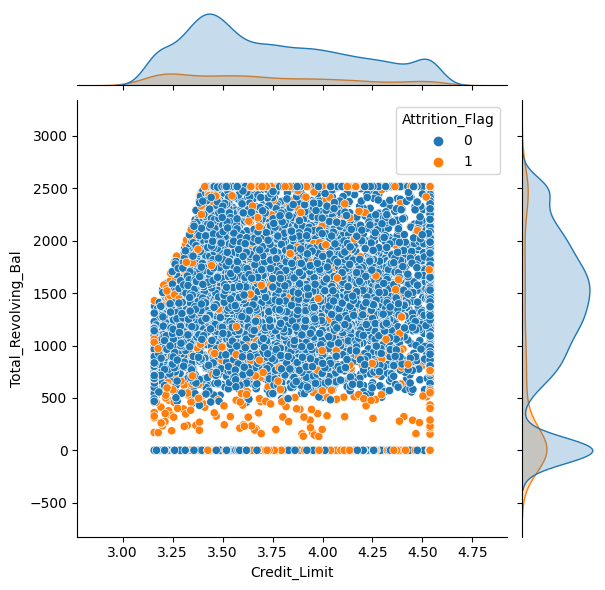

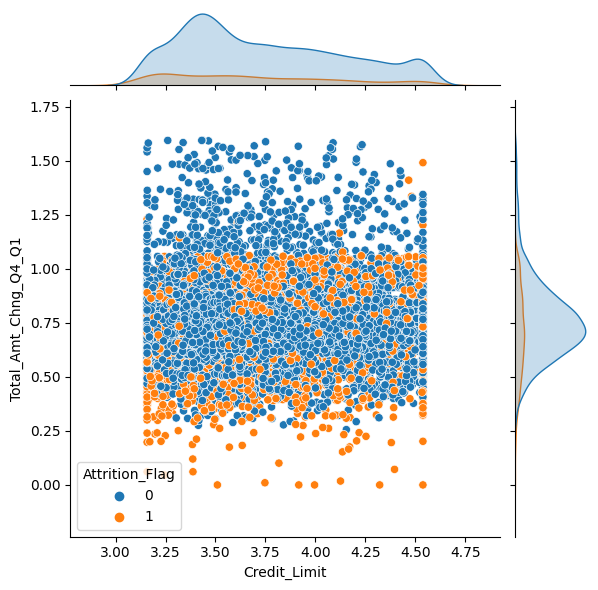

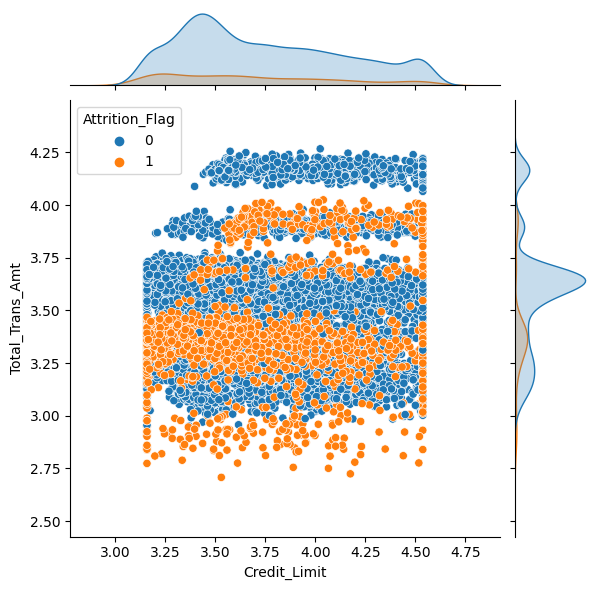

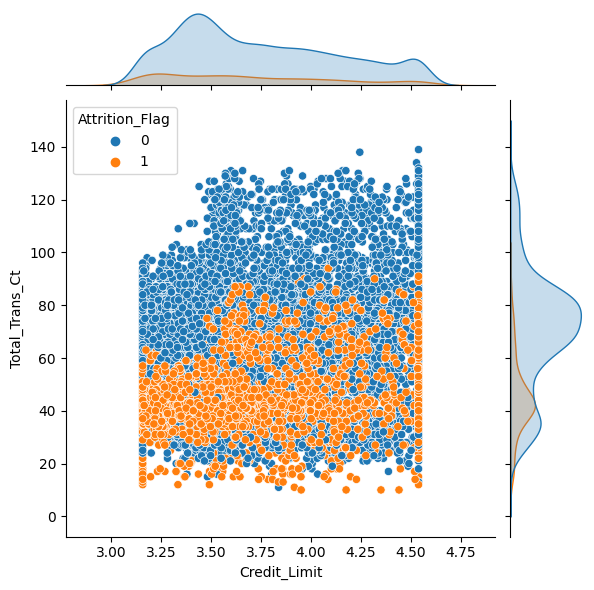

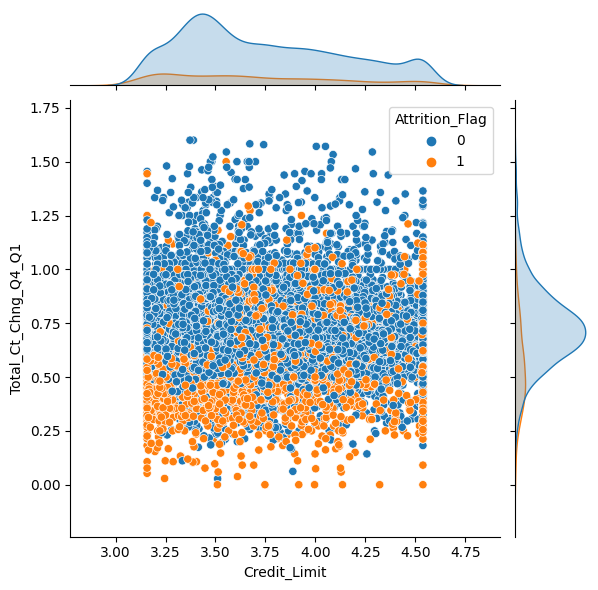

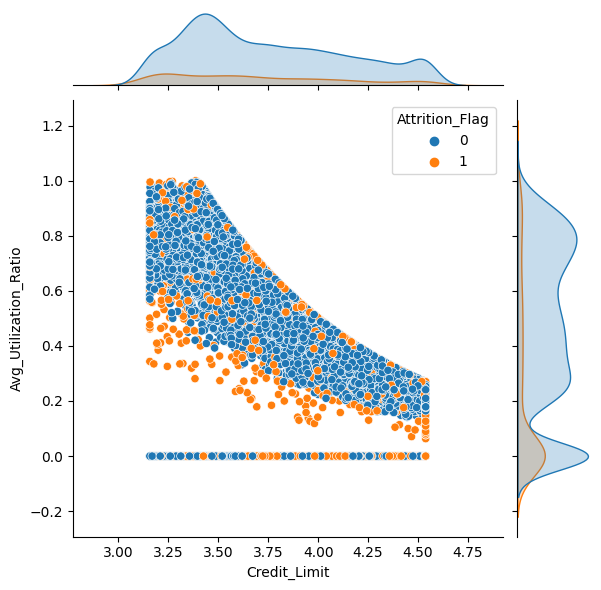

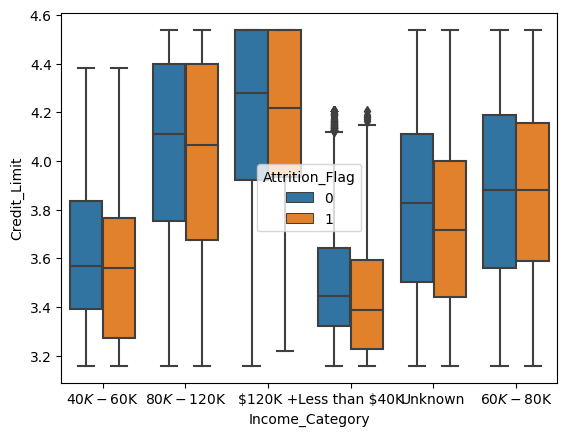

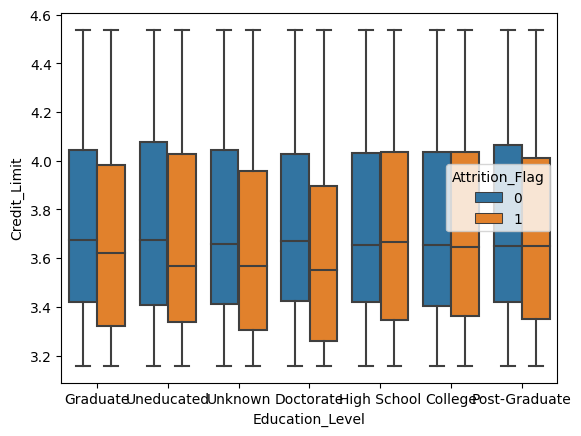

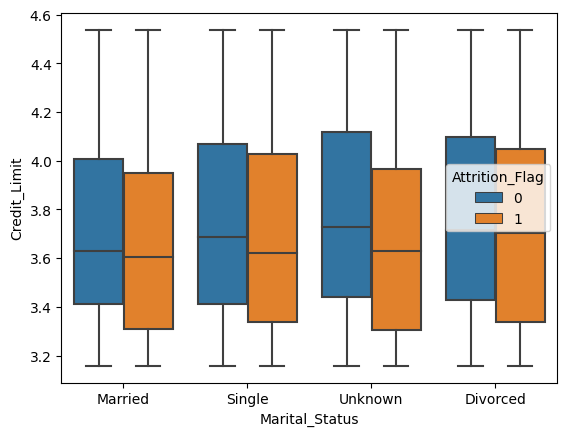

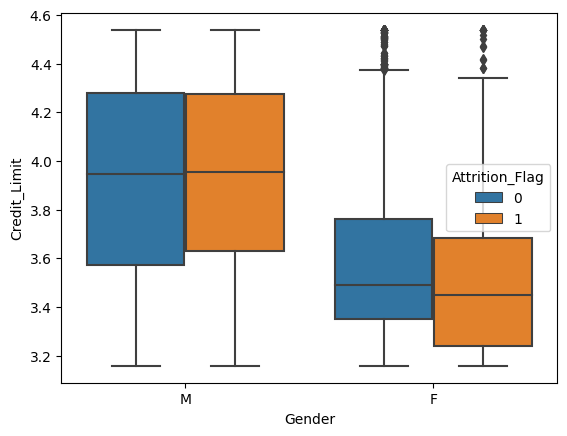

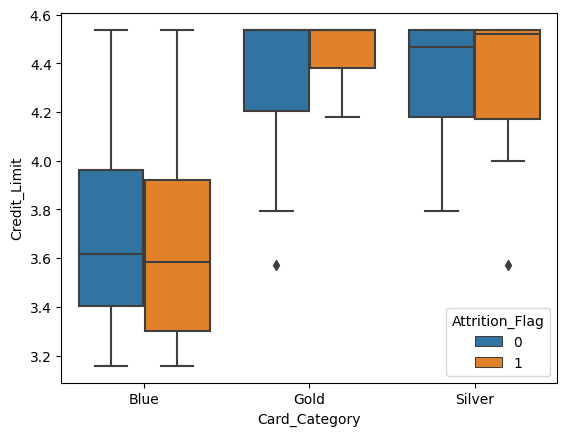

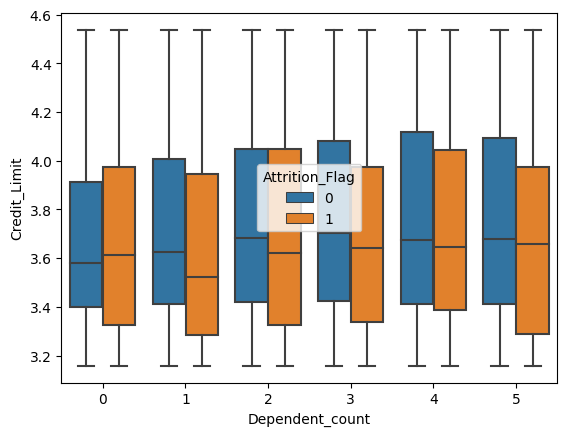

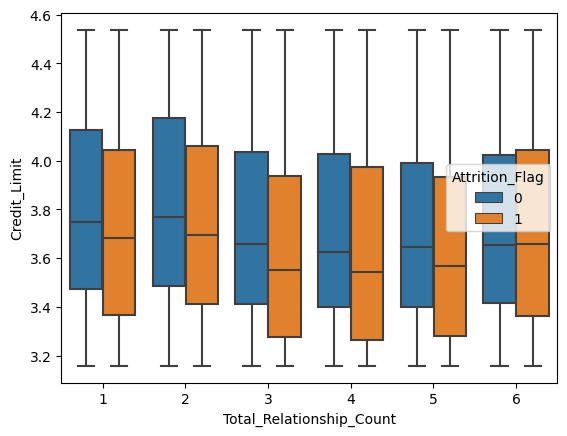

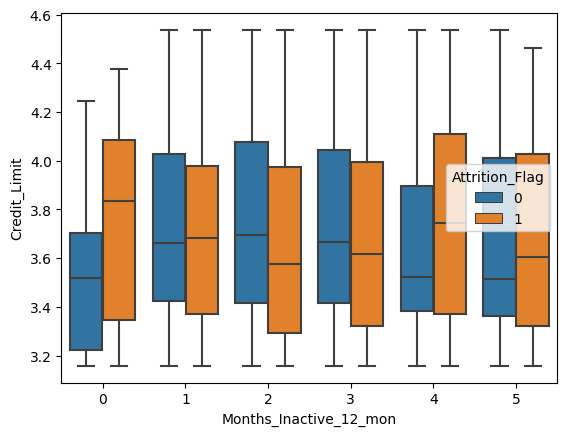

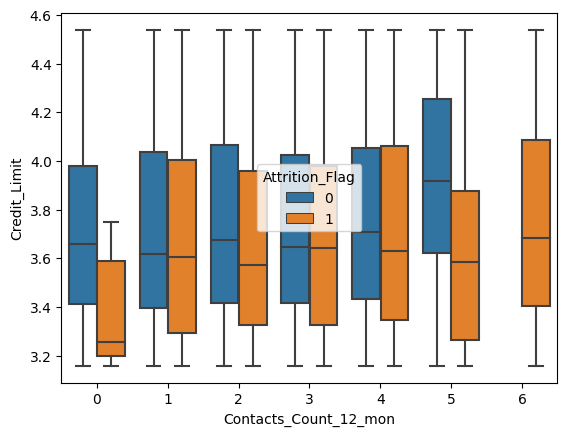

In [85]:
#num_data.remove('Credit_Limit')
for i in num_data:
    sns.jointplot(data = df, x = 'Credit_Limit', y = i, hue = 'Attrition_Flag')
    plt.show()
for j in cat_data:
    sns.boxplot(data = df, x = j, y = 'Credit_Limit', hue = 'Attrition_Flag')
    plt.show()
num_data.append('Credit_Limit')

จากการดูข้อมูล Credit_Limit พบว่าเมื่อเทียบกับ Total_Trans_Amt มองเห็นการแบ่งกลุ่มของข้อมูลในบางส่วน

Plot Categorical Data

- Income_Category
    - คนที่มีรายได้มากกว่า 120k มี credit limit และ avg_open_to_buy สูงกว่ากลุ่มอื่นๆ
    - สังเกตเห็นถึงการแบ่งกลุ่มของ output เมื่อเทียบกับหลายข้อมูลเช่น Total_Revolving_Bal, Total_Trans_Ct, Total_Trans_Ct_Chng_Q4_Q1


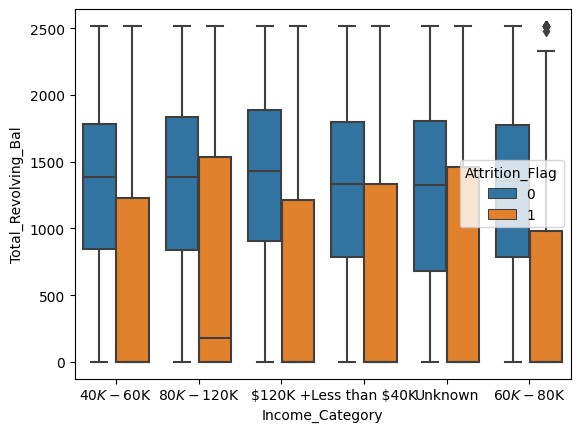

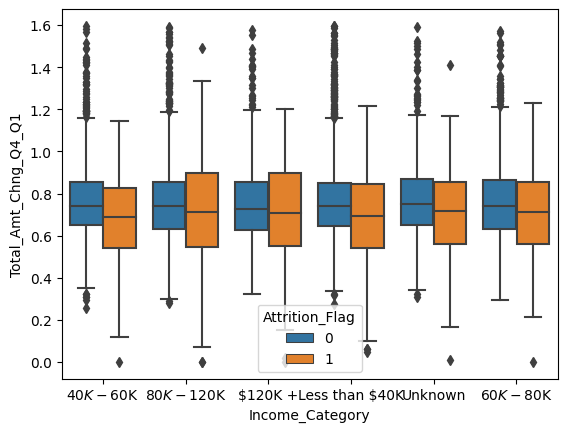

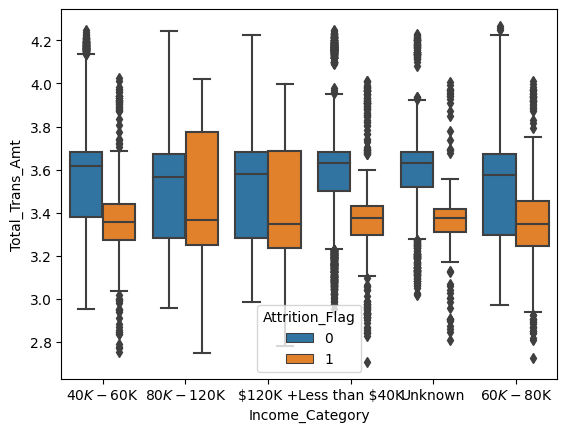

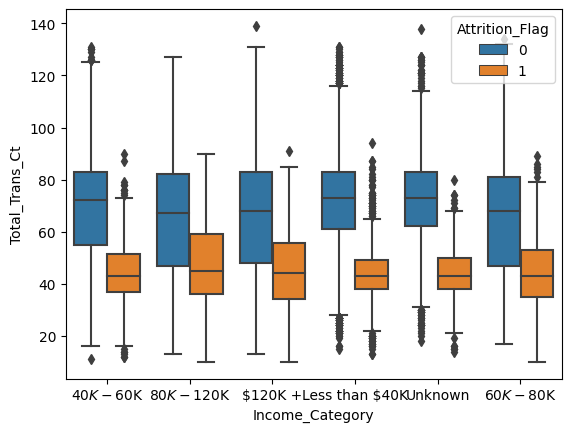

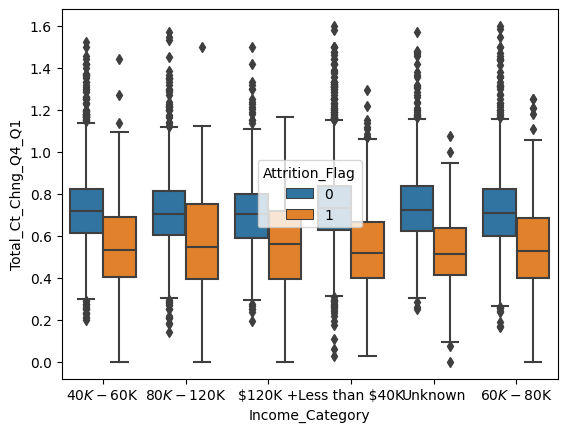

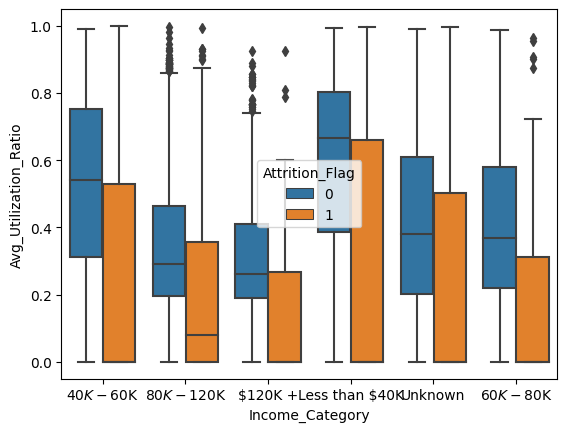

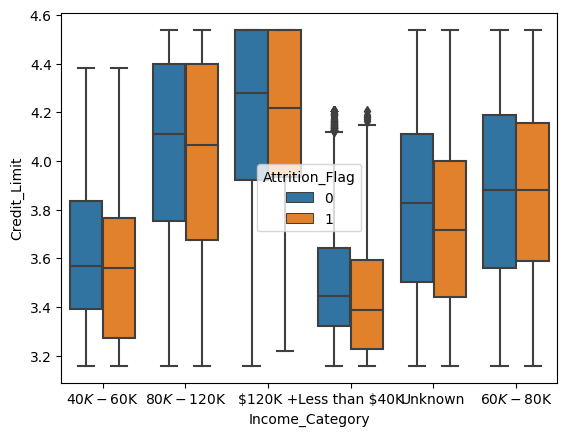

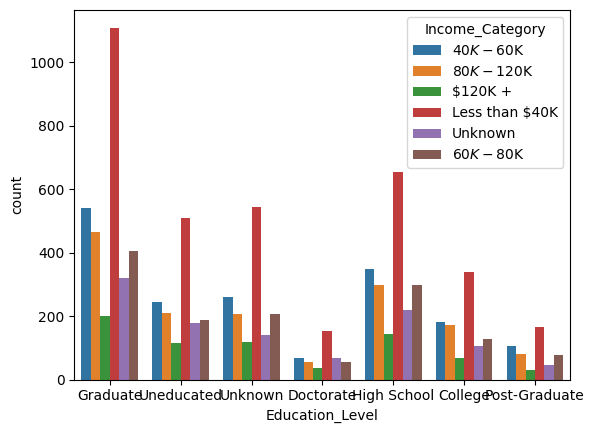

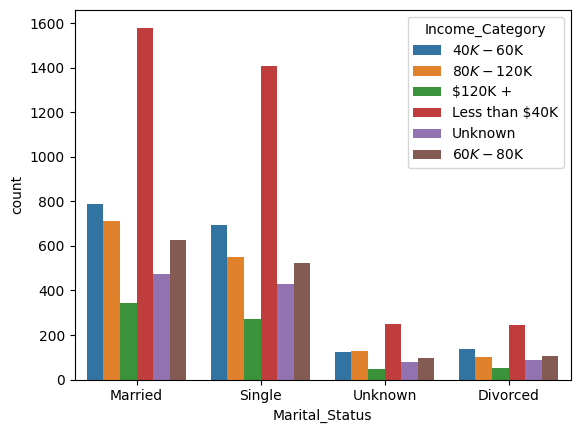

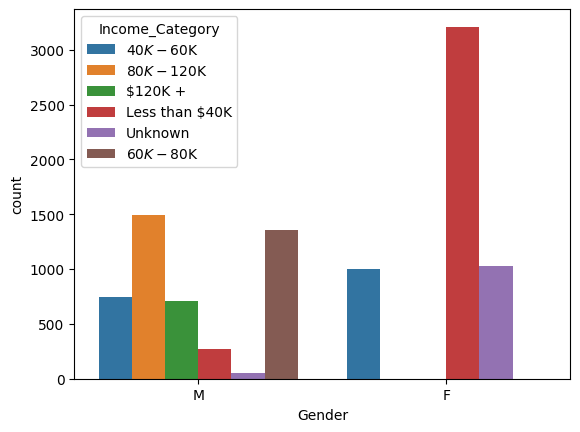

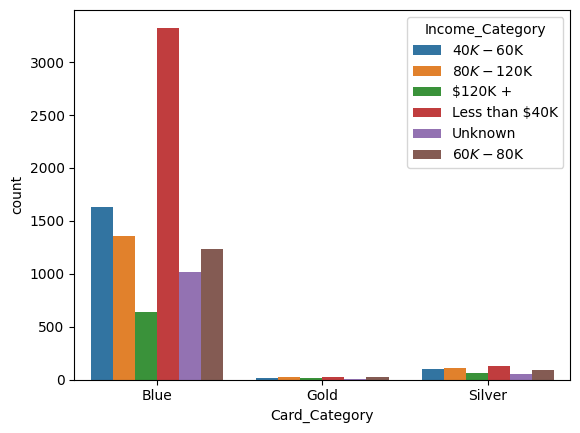

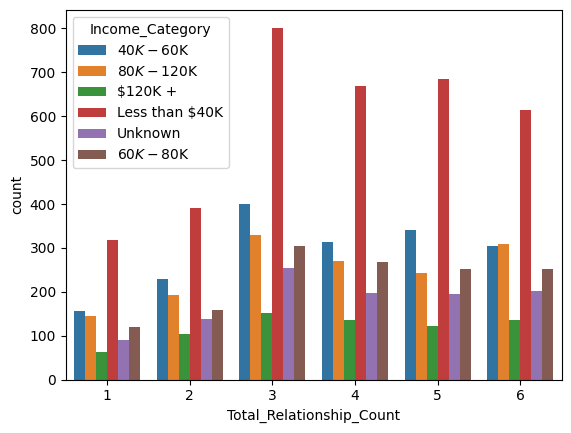

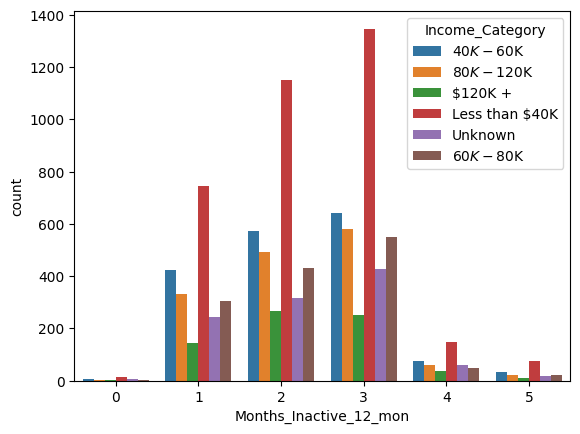

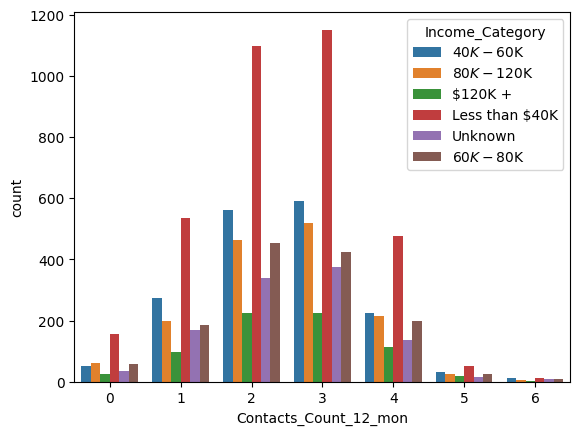

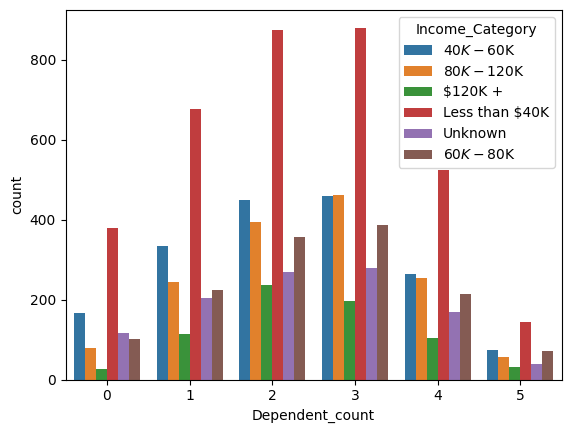

In [89]:
for i in num_data:
    sns.boxplot(data=df, x='Income_Category', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Income_Category')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Income_Category")
    plt.show()

Plot numerical data ที่เหลืออยู่

Plot Categorical Data เปรียบเทียบกับ Output

##### Data Preprocessing